# Vortex Lattice Method

In [1]:
import aerosandbox as asb
import aerosandbox.numpy as np

wing_airfoil = asb.Airfoil("sd7037")
tail_airfoil = asb.Airfoil("naca0010")

### Define the 3D geometry you want to analyze/optimize.
# Here, all distances are in meters and all angles are in degrees.
airplane = asb.Airplane(
    name="Peter's Glider",
    xyz_ref=[0, 0, 0],  # CG location
    wings=[
        asb.Wing(
            name="Main Wing",
            symmetric=True,  # Should this wing be mirrored across the XZ plane?
            xsecs=[  # The wing's cross ("X") sections
                asb.WingXSec(  # Root
                    xyz_le=[0, 0, 0],  # Coordinates of the XSec's leading edge, relative to the wing's leading edge.
                    chord=0.18,
                    twist=2,  # degrees
                    airfoil=wing_airfoil,  # Airfoils are blended between a given XSec and the next one.
                ),
                asb.WingXSec(  # Mid
                    xyz_le=[0.01, 0.5, 0],
                    chord=0.16,
                    twist=0,
                    airfoil=wing_airfoil,
                ),
                asb.WingXSec(  # Tip
                    xyz_le=[0.08, 1, 0.1],
                    chord=0.08,
                    twist=-2,
                    airfoil=wing_airfoil,
                ),
            ]
        ),
        asb.Wing(
            name="Horizontal Stabilizer",
            symmetric=True,
            xsecs=[
                asb.WingXSec(  # root
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=-10,
                    airfoil=tail_airfoil,
                ),
                asb.WingXSec(  # tip
                    xyz_le=[0.02, 0.17, 0],
                    chord=0.08,
                    twist=-10,
                    airfoil=tail_airfoil
                )
            ]
        ).translate([0.6, 0, 0.06]),
        asb.Wing(
            name="Vertical Stabilizer",
            symmetric=False,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=0,
                    airfoil=tail_airfoil,
                ),
                asb.WingXSec(
                    xyz_le=[0.04, 0, 0.15],
                    chord=0.06,
                    twist=0,
                    airfoil=tail_airfoil
                )
            ]
        ).translate([0.6, 0, 0.07])
    ],
    fuselages=[
        asb.Fuselage(
            name="Fuselage",
            xsecs=[
                asb.FuselageXSec(
                    xyz_c=[0.8 * xi - 0.1, 0, 0.1 * xi - 0.03],
                    radius=0.6 * asb.Airfoil("dae51").local_thickness(x_over_c=xi)
                )
                for xi in np.cosspace(0, 1, 30)
            ]
        )
    ]
)

In [2]:
vlm = asb.VortexLatticeMethod(
    airplane=airplane,
    op_point=asb.OperatingPoint(
        velocity=25, # m/s
        alpha=5, # degree
    )
)

C:\GitHub\AeroSandbox\aerosandbox\geometry\wing.py:264: UserWarning: Warning: Using a placeholder aerodynamics model for this Airfoil!
It's highly recommended that you either:
	a) Specify polar functions in the Airfoil constructor, or
	b) Call Airfoil.generate_polars() to auto-generate these polar functions with XFoil.
  if not xsec.airfoil.CL_function(0, 1e6, 0, 0) == 0:  # Surface has to have a symmetric airfoil.
C:\GitHub\AeroSandbox\aerosandbox\geometry\wing.py:266: UserWarning: Warning: Using a placeholder aerodynamics model for this Airfoil!
It's highly recommended that you either:
	a) Specify polar functions in the Airfoil constructor, or
	b) Call Airfoil.generate_polars() to auto-generate these polar functions with XFoil.
  if not xsec.airfoil.CM_function(0, 1e6, 0, 0) == 0:  # Surface has to have a symmetric airfoil.


In [3]:
aero = vlm.run() # Returns a dictionary
for k, v in aero.items():
    print(f"{k.rjust(4)} : {v}")

   L : 81.0323328728096
   D : 1.4970055789690653
   Y : 8.939346333836204e-15
   l : 5.032128966303257e-15
   m : -2.3067223530347656
   n : -8.260538567406457e-15
  CL : 0.7239835512990298
  CD : 0.013374999545893062
  CY : 7.986860893195828e-17
  Cl : 2.225930739086846e-17
  Cm : -0.136444254715661
  Cn : -3.6539975111389763e-17
 F_g : [-5.57112414e+00  8.93934633e-15  8.08544530e+01]
 F_w : (-1.4970055789690653, 8.939346333836204e-15, -81.0323328728096)
 M_g : [-5.73293357e-15 -2.30672235e+00  7.79052579e-15]
 M_w : (5.032128966303257e-15, -2.3067223530347656, -8.260538567406457e-15)


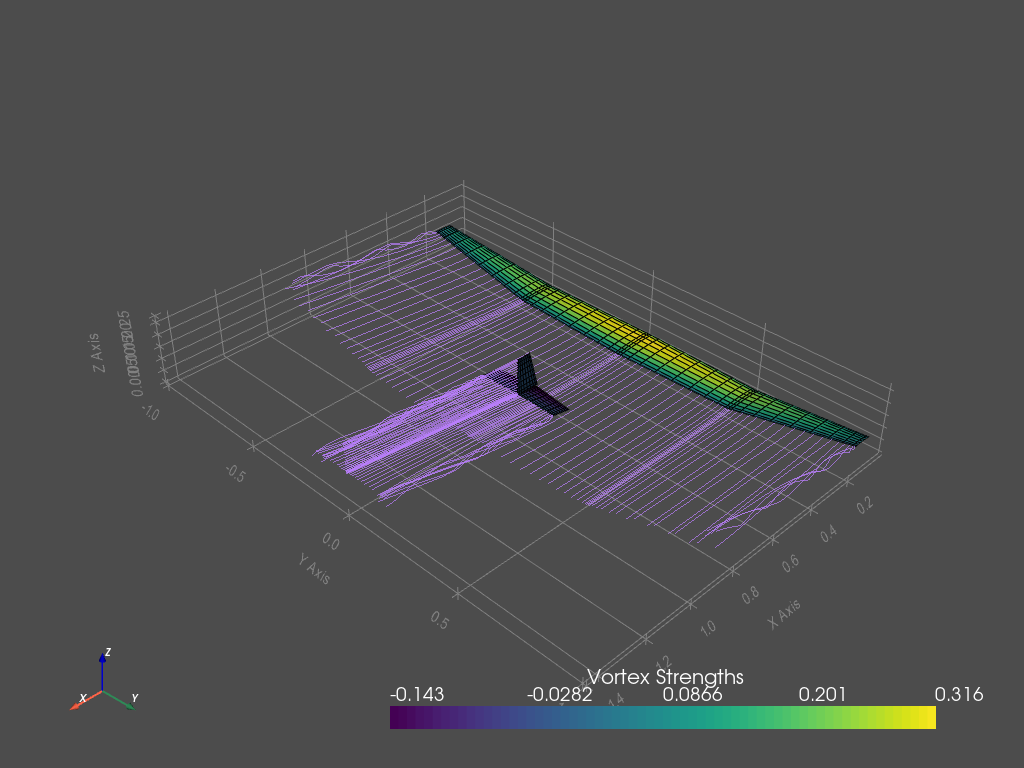

In [5]:
# NBVAL_SKIP

vlm.draw(show_kwargs=dict(jupyter_backend="static"))